In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot
import numpy as np

Using TensorFlow backend.


In [88]:
batch_size = 128
num_classes = 10
epochs = 12

In [100]:
# input image dimensions
img_rows, img_cols = 28, 28

In [101]:
# the data, split between train and test sets
# x - images, y - labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [102]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [103]:
#this change shape of x_train -- adding 1 dimension -- color channel



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [104]:
# convert class vectors to binary class matrices
# from number to vector 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

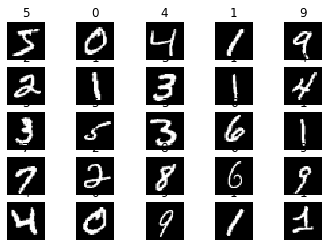

In [105]:
#TRAIN SET
#here we should change shape of images and then we can see titles 
#command x_train[i,:,:,0].reshape(20,20) doesn't work 

for i in range(25):
    pyplot.subplot(5,5,i+1)
    #C = x_train[i,:,:,0].reshape(20,20)
    C = x_train[i,:,:,0]
    pyplot.imshow(C, cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off')
    z=np.nonzero(y_train[i])[0][0]
    pyplot.title(str(z))
    
    #pyplot.tight_layout()
pyplot.show()

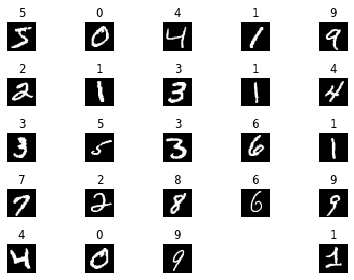

In [106]:
#TRAIN SET
#here when we woudl like to have 25 images and we use tight_layout() it doesn't show 24th image...
#if we don't use tight_layout() we cannot see titles...

for i in range(25):
    pyplot.subplot(5,5,i+1)
    #C = x_train[20*i,:].reshape(20,20)
    pyplot.imshow(x_train[i,:,:,0],cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off')
    z=np.nonzero(y_train[i])[0][0]
    pyplot.title(str(z))
    #pyplot.title(str(y_train[i]))
    pyplot.tight_layout()
pyplot.show()


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#randomly drop 25%
#help nnn?
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 52s 869us/step - loss: 0.2612 - accuracy: 0.9212 - val_loss: 0.0614 - val_accuracy: 0.9805
Epoch 2/12
60000/60000 [==============================] - 50s 828us/step - loss: 0.0887 - accuracy: 0.9740 - val_loss: 0.0424 - val_accuracy: 0.9860
Epoch 3/12
60000/60000 [==============================] - 50s 835us/step - loss: 0.0660 - accuracy: 0.9800 - val_loss: 0.0320 - val_accuracy: 0.9893
Epoch 4/12
60000/60000 [==============================] - 54s 906us/step - loss: 0.0537 - accuracy: 0.9837 - val_loss: 0.0316 - val_accuracy: 0.9887
Epoch 5/12
60000/60000 [==============================] - 51s 842us/step - loss: 0.0464 - accuracy: 0.9865 - val_loss: 0.0375 - val_accuracy: 0.9875
Epoch 6/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0305 - val_accuracy: 0.9896
Epoch 7/12
60000/60000 [==============================]

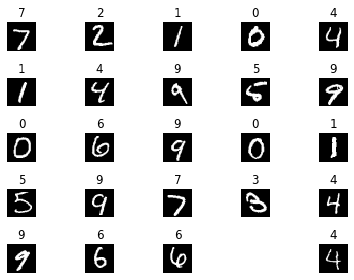

In [108]:
#TEST SET - PREDICTION 
    
for i in range(25):
    pyplot.subplot(5,5,i+1)
    #C = x_train[20*i,:].reshape(20,20)
    pyplot.imshow(x_test[i,:,:,0],cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off')
    z=np.nonzero(y_test[i])[0][0]
    pyplot.title(str(z))
    #pyplot.title(str(y_train[i]))
    pyplot.tight_layout()
pyplot.show()

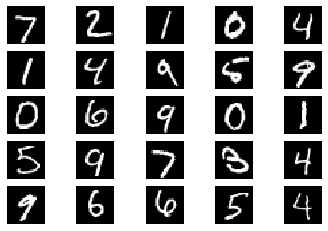

In [79]:
r,c, = 5,5

fig, axs = pyplot.subplots(r, c)
cnt = 0

for i in range(r):
            for j in range(c):
                axs[i,j].imshow(x_test[cnt, :,:,0], cmap='gray')
                z=np.nonzero(y_test[cnt])[0][0]
                #axs[i,j].title(str(z))
                #axs[i,j].set(xlabel=(str(z)))
                axs[i,j].axis('off')
                
                cnt += 1

(-0.5, 27.5, 27.5, -0.5)

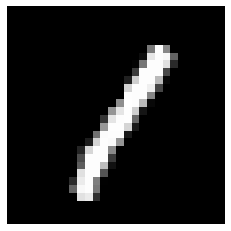

In [81]:
fig, axs = pyplot.subplots()
axs.imshow(x_train[23,:,:,0], cmap='gray')
z=np.nonzero(y_train[23])[0][0]
axs.set(xlabel=(str(z)))
axs.axis('off')

In [0]:
z=np.nonzero(y_test[5])[0][0]

In [0]:
y_test[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
print("An example of number {}".format(y_test[10]))

An example of number [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
y_test[5,1]

1.0

In [83]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    pyplot.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pyplot.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        pyplot.subplot(n_row, n_col, i + 1)
        pyplot.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        pyplot.title(titles[i], size=12)
        pyplot.xticks(())
        pyplot.yticks(())

dane zawierają 60000 cyfr po 28 pixli


ValueError: cannot reshape array of size 784 into shape (20,20)

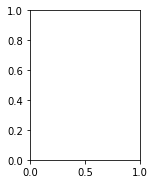

In [85]:
h = 20
w = 20

print("dane zawierają %d cyfr po %d pixli" % (x_train.shape[0], x_train.shape[1]))
 
# Pokaż kilka przykładowych cyfr:
plot_gallery(x_train[0:5000:200,:], y_train[0:5000:200], h, w, n_row=5, n_col=5)
pyplot.show()